# Задание 4

Тот же сайт, но теперь тестируем следующее:

в группе B (тест) предлагаем покупателям дополнительно добавить в корзину еще один товар по скидке
контрольной группе А ничего не предлагаем.

Результаты теста лежат в приложенном файле. В первой колонке флаг тестовой группы, во второй - сумма всех покупок посетителя.


Требуется определить, есть ли статзначимое различие в распределениях на тесте и контроле с уровнем значимости alpha=0.05

На основании этого делаем вывод, что конверсия действительно упала: Zтабл > Zрасч (левосторонний критерий)

In [10]:
!wget https://edu.tinkoff.ru/media/edu-files-ext-100/4894e5f3-00b8-48b7-8946-474b324aa2ad.xlsx

--2021-04-11 13:14:47--  https://edu.tinkoff.ru/media/edu-files-ext-100/4894e5f3-00b8-48b7-8946-474b324aa2ad.xlsx
Resolving edu.tinkoff.ru (edu.tinkoff.ru)... 178.248.239.60
Connecting to edu.tinkoff.ru (edu.tinkoff.ru)|178.248.239.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9338 (9.1K) [binary/octet-stream]
Saving to: ‘4894e5f3-00b8-48b7-8946-474b324aa2ad.xlsx’

4894e5f3-00b8-48b7- 100%[===================>]   9.12K  --.-KB/s    in 0s      

2021-04-11 13:14:47 (244 MB/s) - ‘4894e5f3-00b8-48b7-8946-474b324aa2ad.xlsx’ saved [9338/9338]



In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('/content/4894e5f3-00b8-48b7-8946-474b324aa2ad.xlsx')
data

,Группа,Значение
0,А,1499
1,А,1499
2,А,1099
3,А,1099
4,А,109
...,...,...
100,B,109
101,B,299
102,B,1099
103,B,109


Populating the interactive namespace from numpy and matplotlib


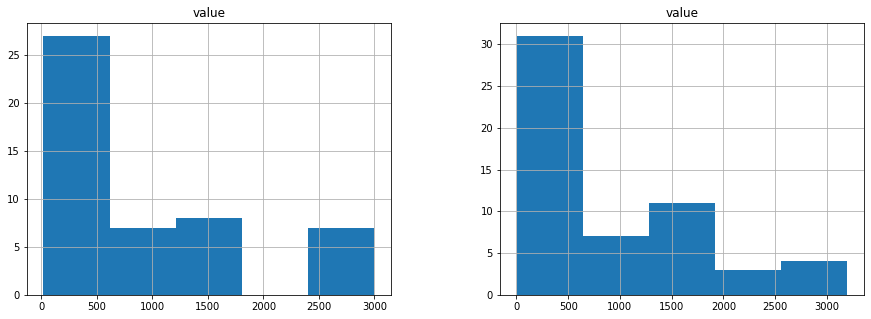

In [30]:
%pylab inline
data.columns = ['group', 'value']
data['group'].replace(['А'], ['A'], inplace = True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

data[data.group == 'A'].hist(bins=5, ax = subplot(1,2,1))
data[data.group == 'B'].hist(bins=5, ax = subplot(1,2,2))

fig.show()

Распределения не похожи на нормальные. 

Проверим гипотезу, вычисляя ранговый критерий Манна-Уитни для выборки, это можно сделать так же через scipy

In [33]:
a = data[data.group == 'A'].value.tolist()
b = data[data.group == 'B'].value.tolist()

print(stats.mannwhitneyu(b, a, alternative ='greater'))
print(stats.mannwhitneyu(b, a, alternative ='two-sided'))

MannwhitneyuResult(statistic=1426.5, pvalue=0.36074614816890277)
MannwhitneyuResult(statistic=1426.5, pvalue=0.7214922963378055)


Значит, различия нет